In [1]:
import numpy as np
from matplotlib import pyplot as plt 


In [3]:
        """
        SIR Zombie Model aka Zombie Apocalypse Model

        s'(t) = h - beta*s*z - delta(s)*s
        I'(t) = beta*s*z - ro*I - delta(I)*I
        Z'(t) = ro*I -  alpha*s*z
        D'(t) = delta(s)*s + delta(I)*I + alpha*s*z
    
    
        s'(t): takes into account those who are suseptible to get infected with the zombie virus
            h : number of humans we begin with
            beta*s*z : Those infected with zombie virus
            delta(s)*s : Those who are dead/killed
            
            
        I'(t): Takes into account those are infected
            ro*I : Number of infected rate
            beta*s*z : Those infected with zombie virus
            delta(I)*I : When people are killed/dead
             
    
        Z'(t): Takes into account those are NOW zombies
            ro*I : Number of infected rate
            alpha*s*z : human and zombie interaction. Humans killing zombies
            
            
        D'(t): Those who are dead
            delta(s)*s : Those who are dead/killed
            delta(I)*I : When people are killed/dead
            alpha*s*z : human and zombie interaction. Humans killing zombies
    
        """
    

"\nSIR Zombie Model aka Zombie Apocalypse Model\n\ns'(t) = h - beta*s*z - delta(s)*s\nI'(t) = beta*s*z - ro*I - delta(I)*I\nZ'(t) = ro*I -  alpha*s*z\nD'(t) = delta(s)*s + delta(I)*I + alpha*s*z\n    \n    \ns'(t): takes into account those who are suseptible to get infected with the zombie virus\n    h : number of humans we begin with\n    beta*s*z : Those infected with zombie virus\n    delta(s)*s : Those who are dead/killed\n    \n    \nI'(t): Takes into account those are infected\n    ro*I : Number of infected rate\n    beta*s*z : Those infected with zombie virus\n    delta(I)*I : When people are killed/dead\n     \n    \nZ'(t): Takes into account those are NOW zombies\n    ro*I : Number of infected rate\n    alpha*s*z : human and zombie interaction. Humans killing zombies\n    \n    \nD'(t): Those who are dead\n    delta(s)*s : Those who are dead/killed\n    delta(I)*I : When people are killed/dead\n    alpha*s*z : human and zombie interaction. Humans killing zombies\n    \n"

In [22]:
def solve(f,y0,interval,steps,order):
    """ Solve ODE by Euler or Runge-Kutta methods, with fixed number
    of steps.

    In contrast to the examples of Newman Chapter 8, which build up a
    list, point by point, 
    
    f: function giving ODE as y'=f(x,y)
    y0: initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta)
    
    Returns (x,y) points, as (steps+1)x2 numpy array.
    """
    (a,b)=interval
    temp = 0
    h=(b - a) / float(steps)
    x=y0
    tpoints= np.arange(a, b, h)
    spoints = []
    ipoints = []
    zpoints = []
    dpoints = []
    
    if (order== 1):
        #Using Euler's method
        for t in (tpoints):
            xpoints.append(x)
            x += h * f(x, t)
        func = (tpoints, xpoints)
    if (order == 2):
        for t in (tpoints):
            xpoints.append(x)
            k1 = h* f(x,t)
            k2 = h* f(x+0.5*k1, t+0.5*h)
            x+= k2
        func = (tpoints, xpoints)
    if (order == 4):
        for t in tpoints:
            spoints.append(x[0])
            ipoints.append(x[1])
            zpoints.append(x[2])
            dpoints.append(x[3])
            k1 = h*f(x,t)
            k2 = h*f(x+0.5*k1,t+0.5*h)
            k3 = h*f(x+0.5*k2,t+0.5*h)
            k4 = h*f(x+k3,t+h)
            x += (k1+2*k2+2*k3+k4)/6
        plt.figure()
        plt.plot(tpoints, spoints, color='b', label='Living')
        plt.plot(tpoints, ipoints, color='r', label='Infected')
        plt.plot(tpoints, zpoints, color='g', label='Zombies')
        plt.plot(tpoints, dpoints, color='k', label='Dead')
    return ()


()

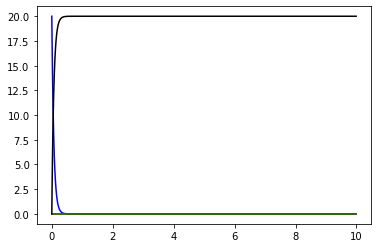

In [25]:

#desclare rage
interval= [0,10]
steps= 1000

h=0          #rate at which people coming into the area/birth rate
d= 40      #death rate
beta= 0   #transmission rate
ro =0     #percent of those who are infected become zombies
alpha= 0


def f(y, t, *args):
    #initialize
    Si=y[0]
    Ii=y[1]
    Zi=y[2]
    Di=y[3]

    f0= h - beta*Si*Zi - d*Si 
    f1= beta*Si*Zi - ro*Ii - d*Ii
    f2= ro*Ii - alpha*Si*Zi
    f3= d*Si + d*Ii + alpha*Si*Zi
    
    return np.array([f0, f1, f2, f3], float)

#initial conditions
S0 = 20.     #initial Population
I0=0.         #Initial infected population
Z0=0.         #initial zombie population
D0=0.         #Initial deaths

y0=[S0, I0, Z0, D0]

solve(f, y0, interval, steps, order=4)
#S= solution[:, 0]
#I= solution[:, 1]
#Z= solution[:, 2]
#D= solution[:, 3]

#plt.figure()
#plt.plot(S, label='Living')
#plt.plot(Z, label='Zombies')
